# Introduction to Python and Natural Language Technologies

__Lecture 10 - NLP applications, Dependency parsing__

__April 20, 2021__

__Kinga Gémes__

Today we are going to look at some NLP applications. If you are interested in the packages used during the lecture, you can check out their websites:

 - [Huggingface transformer pipelines](https://huggingface.co/transformers/main_classes/pipelines.html)
 - [Spacy](https://spacy.io/usage/linguistic-features)
 - [NLTK](https://www.nltk.org/book/)
 - [AllenNLP](https://docs.allennlp.org/main/)
 - [Gensim](https://radimrehurek.com/gensim_3.8.3/auto_examples/index.html)
 - [Stanza](https://stanfordnlp.github.io/stanza/)
 - [WordNet](https://wordnet.princeton.edu/documentation)
 - [ConceptNet](https://conceptnet.io/)

# NLP Applications

In [ ]:
!python3 -m pip install tensorflow
!python3 -m pip install transformers==4.0.0
!python3 -m pip install spacy==3.0
!python3 -m spacy download en_core_web_sm
!python3 -m spacy download de_core_news_sm
!python3 -m pip install allennlp==2.1.0 allennlp-models==2.1.0
!python3 -m pip install nltk
!python3 -m pip install gensim
!python3 -m pip install stanza
!python3 -m pip install conllu
!python3 -m pip install graphviz

In [ ]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer, pipeline

In [ ]:
from gensim.summarization import summarizer as gensim_summarizer

In [ ]:
import spacy

spacy_nlp = spacy.load('en_core_web_sm')
spacy_nlp_de = spacy.load('de_core_news_sm')

In [ ]:
from allennlp.predictors.predictor import Predictor
import allennlp_models.tagging

In [ ]:
import nltk
from nltk.corpus import wordnet as wn

nltk.download("wordnet")
nltk.download('averaged_perceptron_tagger')

In [ ]:
import stanza

stanza.download('en', package='default', processors='tokenize,mwt,pos,lemma,depparse,ner,sentiment', verbose=True)
stanza.download('de', package='default', processors='tokenize,mwt,pos,lemma,depparse,ner,sentiment', verbose=True)
stanza_nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma,depparse,ner,sentiment')
stanza_nlp_de = stanza.Pipeline(lang='de', processors='tokenize,mwt,pos,lemma,depparse,ner,sentiment')

## Sentiment and Emotion analysis

Sentiment analysis is the task of identifying the general sentiment (positive, neutral, negative) of texts.

Emotion detection on the other hand is classifying the specific emotion recognized in the text, such as happiness, anger, surprise, etc.

In [7]:
sentence = "I really like this class."

__AllenNLP__

In [8]:
predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/basic_stanford_sentiment_treebank-2020.06.09.tar.gz")
predictor.predict(sentence)

[W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'really'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'like'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'this'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'class'. Check that your pipeline includes components that assign token.pos, typically 'tagger

{'logits': [0.6455011367797852, -0.6195871829986572],
 'probs': [0.7799007892608643, 0.22009921073913574],
 'token_ids': [63, 118, 43, 21, 810, 7],
 'label': '1',
 'tokens': ['I', 'really', 'like', 'this', 'class', '.']}

__Huggingface__

In [9]:
sentiment = pipeline('sentiment-analysis')
sentiment(sentence)

[{'label': 'POSITIVE', 'score': 0.9998129606246948}]

__Stanza__

In [10]:
stanza_sentiments = {0: 'negative', 1: 'neutral', 2: 'positive'}
doc = stanza_nlp(sentence)
for sent in doc.sentences:
    print(f'{sent.text}\t{stanza_sentiments[sent.sentiment]}')

I really like this class.	positive


### Evaluation

Sentiment and emotion recognition is a classification task and as such can be evaluated by accuracy, F-score and a classification report.

### SOTA

Evaluation dataset: [IMDb dataset](https://ai.stanford.edu/~ang/papers/acl11-WordVectorsSentimentAnalysis.pdf) (categories: positive, negative evenly distributed)

The current SOTA (state-of-the-art) on sentiment analysis is a [system](https://arxiv.org/pdf/1906.08237.pdf), that utilizes XLNet, which is a contextual language model similarly to BERT. This model's accuracy is 96.21%.

## Summarization

Can be:
- Abstractive: we take the text and summerize it with our own words/expressions.
- Extractive: we choose the sentences/expessions, that best summarize the given text.

In [11]:
ARTICLE = """The Duke of Edinburgh has been laid to rest in an intimate funeral at St George's Chapel at Windsor Castle. 
The Dean of Windsor paid tribute to Prince Philip's \"kindness, humour and humanity\" during the ceremony. 
The congregation wore masks and was socially distanced in line with Covid rules, with the Queen seated alone. 
Ahead of the service, the duke's children walked behind his coffin in a funeral procession and there was a national minute's silence.
His coffin was carried the short distance to St George's Chapel on a modified Land Rover, which the duke himself helped to design.
Princess Anne and Prince Charles made up the front row behind the vehicle, followed by Prince Edward and Prince Andrew.
In the third row, Prince William and Prince Harry walked either side of their cousin Peter Phillips.
More than 730 members of the armed forces took part in the event, but there was a limit of 30 mourners inside St George's Chapel, under coronavirus rules.
Prince Philip died at Windsor Castle on Friday 9 April, aged 99.
The funeral procession from the castle to the chapel was headed by the Band of the Grenadier Guards, the Major General's party, and military service chiefs.
Vice Admiral Sir Timothy Laurence and the Earl of Snowdon also walked behind the coffin, trailed by members of the duke's household staff.
The Queen, 94, travelled with a lady-in-waiting in the state Bentley at the end of the procession."""

### Abstractive

__Huggingface__

In [12]:
summarizer = pipeline("summarization")
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))

[{'summary_text': " The Queen was laid to rest in St George's Chapel at Windsor Castle . Her coffin was carried out in a modified Land Rover by the Queen . More than 730 members of the public attended the service ."}]


### Extractive

__Gensim__

In [13]:
print(gensim_summarizer.summarize(ARTICLE))

The Duke of Edinburgh has been laid to rest in an intimate funeral at St George's Chapel at Windsor Castle.
Ahead of the service, the duke's children walked behind his coffin in a funeral procession and there was a national minute's silence.


### Evaluation

Generated summaries can be evaluated using ROUGE (Recall-Oriented Understudy for Gisting Evaluation) score.

 - ROUGE-N: Overlap of N-grams between the predicted and reference summaries.
 - ROUGE-L: Longest Common Subsequence based statistics.
 - ROUGE-W: Weighted LCS-based statistics that favors consecutive LCSes.
 - ROUGE-S: Skip-bigram based co-occurrence statistics. Skip-bigram is any pair of words in their sentence order.
 - ROUGE-SU: Skip-bigram plus unigram-based co-occurrence statistics.

### SOTA

Evaluation dataset: [CNN/Daily Mail dataset](https://arxiv.org/pdf/1506.03340.pdf) (there are anonymized and non-anonymized versions, the systems below are evaluated on the non-anonymized dataset)

The current SOTA (state-of-the-art) on extractive summarization is a [system](https://arxiv.org/pdf/2004.08795.pdf), that utilizes BERT in a siamise (two BERTs with tied-weights and a cosine-similaritylayer during the inference phase) way. Its ROUGE-2 score is 20.86 and its ROUGE-L is 40.55.

The best performing [model](https://arxiv.org/pdf/2010.08014.pdf) on the abstractive summarization task uses a transformer based approach, achieving 22.32 on the ROUGE-2 metric and 42.48 on the ROUGE-L metric.

## Generation

Generating a text from a given prompt. This can be as simple as a random name generator and as comlex as fake news generation.

In [14]:
sentence = "The grade for my homework will be"

__Huggingface__

In [15]:
text_generator = pipeline("text-generation")
print(text_generator(sentence, max_length=50, do_sample=False))

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "The grade for my homework will be a B.\n\nI'm going to be doing a lot of reading and writing. I'm going to be doing a lot of reading and writing. I'm going to be doing a lot of reading and writing"}]


__GPT-2 (huggingface)__

In [16]:
tf.random.set_seed(0)

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

input_ids = tokenizer.encode(sentence, return_tensors='tf')

sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_k=50
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


Output:
----------------------------------------------------------------------------------------------------
The grade for my homework will be about two minutes long and I need to finish reading at 9PM by 7AM. It will make me feel more comfortable when I know that we won't have to change.


### Evaluation
We usually use perplexity (or even accuracy) as the evaluation metric for text generation. Perplexity is the probability of a given sentence based on the dataset.

If we have the necessary resources we can also apply human evaluation on this task. The measure here is the percentage of generated articles/texts that can "fool" a reader (making them think it is human written).

### SOTA

It is hard to pinpoint one exact state-of-the-art system on this task, but probably [GPT-3](https://arxiv.org/pdf/2005.14165.pdf) can be considered as such based on the low accuracy (52%) achieved by human evaluators on GPT-3 generated news articles.

## Machine Translation

Machine translation is the automatic translation of a text in one language to another language.

__Huggingface__

In [17]:
translator = pipeline("translation_en_to_de")
print(translator("This class is about NLP applications.", max_length=40))

[{'translation_text': 'Diese Klasse befasst sich mit NLP-Anwendungen.'}]


### Evaluation

Machine translation can be evaluated using BLEU (BiLingual Evaluation Understudy) score. Similar to ROUGE score, but it is precision oriented instead of recall-oriented. We can also use METEOR (Metric for Evaluation of Translation with Explicit ORdering) for evaluation. The metric is based on the harmonic mean of unigram precision and recall, with recall weighted higher than precision.

### SOTA

Datasets: WMT 2014 EN-DE (English-German) and WMT 2014 EN-FR (English-French) both from the Ninth Workshop on Statistical Machine Translation.

SOTA on en-de uses a [semi-supervised approach](https://arxiv.org/pdf/1808.09381.pdf) achieving 35.0 BLEU score.

The SOTA on the en-fr is presented by the [DeepL](https://www.deepl.com/press.html) team achieveng 45.9 BLEU score.

## Question Answering

The system has to predict the answer to a question with a given context.

In [18]:
context = 'Adam went to the store yesterday.'
question = 'Who went to the store?'

__Huggingface__

In [19]:
question_answerer = pipeline('question-answering')
question_answerer({
    'question': question,
    'context': context})

{'score': 0.9957689642906189, 'start': 0, 'end': 4, 'answer': 'Adam'}

__AllenNLP__

In [20]:
predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/bidaf-elmo.2021-02-11.tar.gz")
res = predictor.predict(
    passage=context,
    question=question
)
print(res['best_span_str'])

/home/kinga/.local/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")
[W108] The rule-based lemmatizer did not find POS annotation for the token 'Adam'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'went'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typica

Adam


### Evaluation

We can use EM (Exact Match) evaluation to evaluate answers for question answering tasks, which is a very conservative method. Since we are generating the answer (if the task is not multiple-choise answer selection, in which case F-score is adequate) we can also use ROUGE, BLEU or METEOR as well.

### SOTA

Dataset: [RACE](https://arxiv.org/pdf/1704.04683.pdf) dataset for reading comprechension and [SQuAD](https://arxiv.org/pdf/1606.05250.pdf).

The state-of-the-art on the RACE dataset is an [ALBERT](https://arxiv.org/pdf/2011.03292.pdf) based approach with 91.4% RACE score. You can se the whole leaderboard [here](http://www.qizhexie.com//data/RACE_leaderboard).

On the SQuAD dataset, the best performing model is currently an ensemble model with 93.183% F1 score (no available paper). You can se the whole leaderboard [here](https://rajpurkar.github.io/SQuAD-explorer/).

## Part-of-Speech (POS) tagging and Named Entity Recognition (NER)

__IOB format__

| Tag | Meaning |
|:--:|:--:|
| I | token is inside an entity |
| O | Token is outside an entity |
| B | Token is the beginning of an entity |

IOB format refers to the Inside-Outside-Beginning tags that we can assign at the beggining of a tag to specify the placement of the given token within one entity.

For example the text "Chuck Norris" has the following IOB formatted NER tags: I-PER, I-PER.

If we are using IOB2 it would be B-PER, I-PER.

__BILUO format__

| Tag | Meaning |
|:--:|:--:|
| B | token is the beginning of a multi-token entity |
| I | token is inside a multi-token entity |
| L | token is the last token of a multi-token entity |
| U | token is a single-token unit entity |
| O | toke is outside an entity |

For example the text "Chuck Norris" has the following BILUO NER tags: B-PER, L-PER.

In [7]:
sentence = "New York is a big city with Central Park in the middle."

### POS

__Spacy__

In [22]:
spacy_doc = spacy_nlp(sentence)
for token in spacy_doc:
    print(f'{token.text}\t{token.pos_}')

New	PROPN
York	PROPN
is	AUX
a	DET
big	ADJ
city	NOUN
with	ADP
Central	PROPN
Park	PROPN
in	ADP
the	DET
middle	NOUN
.	PUNCT


__NLTK__

In [23]:
tokens = nltk.word_tokenize(sentence)
tags = nltk.pos_tag(tokens)
for tag in tags:
    print(f'{tag[0]}\t{tag[1]}')

New	NNP
York	NNP
is	VBZ
a	DT
big	JJ
city	NN
with	IN
Central	NNP
Park	NNP
in	IN
the	DT
middle	NN
.	.


__Stanza__

In [24]:
stanza_doc = stanza_nlp(sentence)
for sent in stanza_doc.sentences:
    for token in sent.words:
        print(f'{token.text}\t{token.upos}\t{token.xpos}')

New	PROPN	NNP
York	PROPN	NNP
is	AUX	VBZ
a	DET	DT
big	ADJ	JJ
city	NOUN	NN
with	ADP	IN
Central	PROPN	NNP
Park	PROPN	NNP
in	ADP	IN
the	DET	DT
middle	NOUN	NN
.	PUNCT	.


### NER

__Spacy__

In [25]:
for token in spacy_doc:
    dash = '-' if token.ent_type_ != '' else ''
    print(f'{token.text}\t{token.ent_iob_}{dash}{token.ent_type_}')

New	B-GPE
York	I-GPE
is	O
a	O
big	O
city	O
with	O
Central	B-LOC
Park	I-LOC
in	O
the	O
middle	O
.	O


__Huggingface__

In [8]:
ner = pipeline('ner')
ner(sentence)

[{'word': 'New',
  'score': 0.9995982050895691,
  'entity': 'I-LOC',
  'index': 1,
  'start': 0,
  'end': 3},
 {'word': 'York',
  'score': 0.9995265007019043,
  'entity': 'I-LOC',
  'index': 2,
  'start': 4,
  'end': 8},
 {'word': 'Central',
  'score': 0.9924962520599365,
  'entity': 'I-LOC',
  'index': 8,
  'start': 28,
  'end': 35},
 {'word': 'Park',
  'score': 0.9970067739486694,
  'entity': 'I-LOC',
  'index': 9,
  'start': 36,
  'end': 40}]

__AllenNLP__

In [9]:
predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/ner-elmo.2021-02-12.tar.gz")
res = predictor.predict(sentence=sentence)
for word, tag in zip(res['words'], res['tags']):
    print(f'{word}\t{tag}')

/home/kinga/.local/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


New	B-LOC
York	L-LOC
is	O
a	O
big	O
city	O
with	O
Central	B-LOC
Park	L-LOC
in	O
the	O
middle	O
.	O


### Evaluation

The tagging task is classification task and can be evaluated by the accuracy and the F-score achieved on the task.

### SOTA

Datasets: [Penn Treebank](https://www.aclweb.org/anthology/J93-2004.pdf) for POS and [CoNLL 2003](https://www.aclweb.org/anthology/W03-0419.pdf) for NER.

The SOTA [model](https://arxiv.org/pdf/1805.08237.pdf) for POS tagging uses BiLSTMs and context sensitive token encodings achieveng 97.96% accuracy.

On the NER task the best performing [system](https://www.aclweb.org/anthology/2020.emnlp-main.523.pdf) utilizes a multi-layer  bidirectional  transformer to achieve 94.3% F1 score.

## Morphological analysis

"Inflectional morphology is the process by which a root form of a word is modified by adding prefixes or suffixes that specify its grammatical function but do not change its part-of-speech. We say that a lemma (root form) is inflected (modified/combined) with one or more morphological features to create a surface form." ([from here](https://spacy.io/usage/linguistic-features#morphology))

In [10]:
sentence_de = "Wo bist du? Warum bist du nicht hier? Die Katze ist hier."
# Where are you? Why are you not here? The cat is here.

__Spacy__

In [11]:
spacy_doc = spacy_nlp_de(sentence_de)
for token in spacy_doc:
    print(f'{token.text}\t{token.morph}')

Wo	PronType=Int
bist	Mood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin
du	Case=Nom|Number=Sing|Person=2|PronType=Prs
?	
Warum	PronType=Int
bist	Mood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin
du	Case=Nom|Number=Sing|Person=2|PronType=Prs
nicht	
hier	
?	
Die	Case=Nom|Definite=Def|Gender=Fem|Number=Sing|PronType=Art
Katze	Case=Nom|Gender=Fem|Number=Sing
ist	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
hier	
.	


__Stanza__

In [12]:
stanza_doc = stanza_nlp_de(sentence_de)
for sent in stanza_doc.sentences:
    for token in sent.words:
        print(f'{token.text}\t{token.feats}')

Wo	PronType=Int
bist	Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin
du	Case=Nom|Number=Sing|Person=2|PronType=Prs
?	None
Warum	PronType=Int
bist	Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin
du	Case=Nom|Number=Sing|Person=2|PronType=Prs
nicht	Polarity=Neg
hier	None
?	None
Die	Case=Nom|Definite=Def|Gender=Fem|Number=Sing|PronType=Art
Katze	Case=Nom|Gender=Fem|Number=Sing
ist	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
hier	None
.	None


## Chatbots

Important distinction between chit-chat bots (like [Cleverbot](https://www.cleverbot.com/)) and task specific chatbots (like [Ticketmaster](https://www.chatbotguide.org/ticketmaster-bot)).

__Huggingface__

In [13]:
from transformers import Conversation

chit_chat = pipeline('conversational')
conversation_1 = Conversation("Hi! How are you?")
conversation_2 = Conversation("Do you like movies?")
chit_chat([conversation_1, conversation_2])

Some weights of GPT2Model were not initialized from the model checkpoint at microsoft/DialoGPT-medium and are newly initialized: ['transformer.h.0.attn.masked_bias', 'transformer.h.1.attn.masked_bias', 'transformer.h.2.attn.masked_bias', 'transformer.h.3.attn.masked_bias', 'transformer.h.4.attn.masked_bias', 'transformer.h.5.attn.masked_bias', 'transformer.h.6.attn.masked_bias', 'transformer.h.7.attn.masked_bias', 'transformer.h.8.attn.masked_bias', 'transformer.h.9.attn.masked_bias', 'transformer.h.10.attn.masked_bias', 'transformer.h.11.attn.masked_bias', 'transformer.h.12.attn.masked_bias', 'transformer.h.13.attn.masked_bias', 'transformer.h.14.attn.masked_bias', 'transformer.h.15.attn.masked_bias', 'transformer.h.16.attn.masked_bias', 'transformer.h.17.attn.masked_bias', 'transformer.h.18.attn.masked_bias', 'transformer.h.19.attn.masked_bias', 'transformer.h.20.attn.masked_bias', 'transformer.h.21.attn.masked_bias', 'transformer.h.22.attn.masked_bias', 'transformer.h.23.attn.masked

[Conversation id: 06e6290f-2871-4d07-9143-189b4cd35c3b 
 user >> Hi! How are you? 
 bot >> I'm good, how are you? ,
 Conversation id: 31da97fd-acd8-4bd8-9139-d09f9041450c 
 user >> Do you like movies? 
 bot >> I like movies. ]

### Frameworks

There are already existing frameworks that make it easy to write chatbots for specific tasks. One of these frameworks is [rasa](https://rasa.com/).

# Dependency Parsing

In [1]:
from stanza.utils.conll import CoNLL
from stanza.models.common.doc import Document
from spacy import displacy
import conllu
import graphviz
import os
import requests

In [15]:
# Some helper functions for visualization and conversion

def visualize(parsed):
    dot = graphviz.Digraph()
    dot.node("0", "ROOT", shape="box")
    for sentence in parsed.sentences:
        for token in sentence.tokens:
            for word in token.words:
                dot.node(str(word.id), word.text)
                dot.edge(str(word.head), str(word.id),
                         label=word.deprel)
    return dot

def visualize_allen(parsed):
    dot = graphviz.Digraph()
    dot.node("0", "ROOT", shape="box")
    for i, (word, dep, head) in \
    enumerate(zip(parsed['words'], parsed['predicted_dependencies'], parsed['predicted_heads'])):
        id_ = str(i+1)
        dot.node(id_, word)
        dot.edge(str(head), id_, label=dep)
    return dot

def visualize_spacy(parsed):
    dot = graphviz.Digraph()
    dot.node("0", "ROOT", shape="box")
    for token in parsed:
        id_ = str(token.i+1)
        head = token.head.i+1 if token.dep_ != 'ROOT' else 0
        dot.node(id_, token.text)
        dot.edge(str(head), id_, label=token.dep_)
    return dot

def print_conllu(parsed):
    conll_sentence = CoNLL.convert_dict(parsed.to_dict())
    for sent in conll_sentence:
        for token in sent:
            print("\t".join(token))

def conll_to_stanza(conll):
    lines = conll.serialize().strip().split('\n')
    tokenized = [line.strip().split("\t") for line in 
                 lines if not line.startswith("#")]
    return Document(CoNLL.convert_conll([tokenized]))

In [16]:
# Print out the apple graph in the given step
def apple(step=0):
    color = 'blue' if step == 2 else 'black'
    apple = graphviz.Digraph()
    apple.edge("ROOT", "I", label="a=2")
    if step % 2 == 0:
        apple.edge("ROOT", "like", label="b=4", color=color)
        apple.edge("like", "I", label="d=3", color=color)
        apple.edge("like", "apples", label="f=6", color=color)
        apple.edge("ROOT", "apples", label="c=2")
        apple.edge("I", "like", label="e=-1")
        apple.edge("apples", "like", label="g=5")
        apple.edge("I", "apples", label="h=-1")
        apple.edge("apples", "I", label="i=-4")
    else:
        apple.edge("ROOT", "l_a", label="b=4-5")
        apple.edge("ROOT", "l_a", label="c=2-6")
        apple.edge("l_a", "I", label="d=3", color="blue")
        apple.edge("I", "l_a", label="e=-1-5")
        apple.edge("I", "l_a", label="h=-1-6")
        apple.edge("l_a", "I", label="i=-4")
    return apple

## Grammar

_Why do we need it?_ Information about the syntax of the sentence can enhance our natural language models.

### Context free grammar

_Definition:_ A context-free grammar G is defined by four parameters: N, $\Sigma$, R, S.

 - N is a set of non-terminal symbols or variables

 - $\Sigma$ is a set of terminal symbols

 - R is a set of rules or productions, each in the form of A -> B, where A is a non-terminal and B is a string of symbols from ($\Sigma$ $\cup$ N)*

 - S is the designated starting symbol
 
### Constituency grammar

Constituency is an abstraction, where groups of words behave as units. We usually use context free grammars for modeling constituent structures.

We have the following syntactic categories (these are the non-terminals in CFG):

| Symbol | Meaning |
| :-: | :-: |
| S | sentence |
| NP | noun phrase |
| VP | verb phrase |
| PP | prepositional phrase |
| Det | determiner |
| N | noun |
| V | verb |
| P | preposition |


## Dependency graphs

Dependency structure shows which words depend on which other words in a sentence (or phrase). This is a binary asymmetric relation between a head and its dependents. The relations are typed with the grammatical relation that is between the pair of words.

The dependencies form a tree, where the head is the root of the sentence (in english this is usually the tensed verb).

A major advantage of dependency grammars is their ability to deal with languages that are morphologically rich and have a relatively free word order, which is very usefull with languages that have flexible word ordering.

A dependency tree is a directed graph that satisfies the following constraints:
 - There is a single designated root node that has no incoming arcs.
 - With the exception of the root node, each vertex has exactly one incoming arc.
 - There is a unique path from the root node to each vertex in V.

from: _[Speech and Language Processing by Daniel Jurafsky and James H. Martin.](https://web.stanford.edu/~jurafsky/slp3/)_

![dep](https://nlp.stanford.edu/software/stanford-dependencies/brownback-uncollapsed.png)
_Bills on ports and immigration were submitted by Senator Brownback, Republican of Kansas_

__Projectivity__

_Definition:_ There are no crossing dependency arcs when the words are laid out in their linear order, with all arcs above the words.

Dependency grammars usually allow non-projective structures to account for a more free word order.

![nonprojective](img/dl/nonprojective.png)

image from: [Non-projective Dependency Parsing using Spanning Tree Algorithms by Ryan McDonald et. al.](https://www.seas.upenn.edu/~strctlrn/bib/PDF/nonprojectiveHLT-EMNLP2005.pdf)

__Syntax ambiguity__

Example: _One morning I shot an elephant in my pajamas. How he got into my pajamas I’ll never know._ - Groucho Marx

The ambiguity in this sentence:

is it:

 - One morning I shot an __elephant in my pajamas__

or

 - One morning __I__ shot an elephant __in my pajamas__

___CFG for this sentence___

 - S -> NP VP
 - PP -> P NP
 - NP -> Det N | Det N PP | 'I'
 - VP -> V NP | VP PP
 - Det -> 'an' | 'my'
 - N -> 'elephant' | 'pajamas'
 - V -> 'shot' | 'saw'
 - P -> 'in'

One morning _I_ shot an elephant _in my pajamas_ |  One morning I shot an _elephant in my pajamas_
:-------------------------:|:-------------------------:
![elephant1](https://www.nltk.org/book/tree_images/ch08-tree-1.png) | ![elephant2](https://www.nltk.org/book/tree_images/ch08-tree-2.png)

___Dependency graph for this sentence___

One morning _I_ shot an elephant _in my pajamas_ |  One morning I shot an _elephant in my pajamas_
:-------------------------:|:-------------------------:
![elephant_dep1](https://www.nltk.org/book/tree_images/ch08-tree-11.png) | ![elephant_dep2](https://www.nltk.org/book/tree_images/ch08-tree-10.png)

Images from the [NLT book](https://www.nltk.org/book/).

## Universal Dependencies

The structure of a sentence can be represented by a so called universal dependency (UD) graph.
The universal in the name refers to the original goal: a consistent cross-lingual grammatic annotation.

The full list of Universal Dependencies can be found on the [universal dependencies website](https://universaldependencies.org/u/dep/)

|  | Nominals | Clauses | Modifier words | Function Words |
| :-: | :-: | :-: | :-: | :-: |
| **Core arguments** | nsubj (nominal subject), obj (object), iobj (indirect object) | csubj (clausal subject), ccomp (clausal complement), xcomp (open clausal complement) |  |  |
| **Non-core dependents** | obl (oblique nominal), vocative, expl (expletive), dislocated (dislocated elements) | advcl (adverbial clause modifier) | advmod (adverbial modifier), discourse (discourse element) | aux (auxiliary), cop (copula), mark (marker) |
| **Nominal dependents** | nmod (nominal modifier), appos (appositional modifier), nummod (numeric modifier) | acl (clausal modifier of noun (adjectival clause)) | amod (adjectival modifier) | det (determiner), clf (classifier), case (case marking) |

| Coordination | MWE | Loose | Special | Other |
| :-: | :-: | :-: | :-: | :-: |
| conj (conjunct), cc (coordinating conjunction) | fixed (fixed multiword expression), flat (flat multiword expression), compound | list, parataxis | orphan, goeswith (goes with), reparandum (overridden disfluency) | punct (punctuation), root, dep (unspecified dependency) |


__CoNLL-U format__

| ID | FORM | LEMMA | UPOS | XPOS | FEATS | HEAD | DEPREL | DEPS | MISC |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| Word index, integer starting at 1 for each new sentence; may be a range for multiword tokens; may be a decimal number for empty nodes (decimal numbers can be lower than 1 but must be greater than 0). | Word form or punctuation symbol. | Lemma or stem of word form. | Universal part-of-speech tag. | Language-specific part-of-speech tag; underscore if not available. | List of morphological features from the universal feature inventory or from a defined language-specific extension; underscore if not available. | Head of the current word, which is either a value of ID or zero (0). | Universal dependency relation to the HEAD (root iff HEAD = 0) or a defined language-specific subtype of one. | Enhanced dependency graph in the form of a list of head-deprel pairs. | Any other annotation. |

Example:

| ID | FORM | LEMMA | UPOS | XPOS | FEATS | HEAD | DEPREL | DEPS | MISC |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 1 | They | they | PRON | PRP | Case=Nom\|Number=Plur | 2 | nsubj | 2:nsubj\|4:nsubj | _ |
| 2 | buy | buy | VERB | VBP | Number=Plur\|Person=3\|Tense=Pres | 0 | root | 0:root | _ |
| 3 | and | and | CONJ | CC | _ | 4 | cc | 4:cc | _ |
| 4 | sell | sell | VERB | VBP | Number=Plur\|Person=3\|Tense=Pres | 2 | conj | 0:root\|2:conj | _ |
| 5 | books | book | NOUN | NNS | Number=Plur | 2 | obj | 2:obj\|4:obj | SpaceAfter=No |
| 6 | . | . | PUNCT | . | _ | 2 | punct | 2:punct | _ |


from https://universaldependencies.org/format.html

__UD treebanks__

We use UD Treebanks to train models that can predict the UD structure of sentences. There are 183 treebanks and 104 languages in version 2.7, which came out November 15, 2020. The next release (v2.8) is scheduled for May 15, 2021.

In [17]:
url = "https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-3424/ud-treebanks-v2.7.tgz"
tgz = 'ud-treebanks-v2.7.tgz'
directory = 'ud_treebanks'
if not os.path.exists(directory):
    import tarfile
    response = requests.get(url, stream=True)
    with open(tgz, 'wb') as ud:
        ud.write(response.content)
    os.mkdir(directory)
    with tarfile.open(tgz, 'r:gz') as _tar:
        for member in _tar:
            if member.isdir():
                continue
            fname = member.name.rsplit('/',1)[1]
            _tar.makefile(member, os.path.join(directory, fname))

In [18]:
en = "ud_treebanks/en_ewt-ud-train.conllu"
with open(en) as english:
    trees = conllu.parse(english.read())

In [19]:
index = 1
trees[index].metadata["text"]

'[This killing of a respected cleric will be causing us trouble for years to come.]'

In [20]:
print(trees[index].serialize())

# sent_id = weblog-juancole.com_juancole_20051126063000_ENG_20051126_063000-0002
# text = [This killing of a respected cleric will be causing us trouble for years to come.]
1	[	[	PUNCT	-LRB-	_	10	punct	10:punct	SpaceAfter=No
2	This	this	DET	DT	Number=Sing|PronType=Dem	3	det	3:det	_
3	killing	killing	NOUN	NN	Number=Sing	10	nsubj	10:nsubj	_
4	of	of	ADP	IN	_	7	case	7:case	_
5	a	a	DET	DT	Definite=Ind|PronType=Art	7	det	7:det	_
6	respected	respected	ADJ	JJ	Degree=Pos	7	amod	7:amod	_
7	cleric	cleric	NOUN	NN	Number=Sing	3	nmod	3:nmod:of	_
8	will	will	AUX	MD	VerbForm=Fin	10	aux	10:aux	_
9	be	be	AUX	VB	VerbForm=Inf	10	aux	10:aux	_
10	causing	cause	VERB	VBG	VerbForm=Ger	0	root	0:root	_
11	us	we	PRON	PRP	Case=Acc|Number=Plur|Person=1|PronType=Prs	10	iobj	10:iobj	_
12	trouble	trouble	NOUN	NN	Number=Sing	10	obj	10:obj	_
13	for	for	ADP	IN	_	14	case	14:case	_
14	years	year	NOUN	NNS	Number=Plur	10	obl	10:obl:for	_
15	to	to	PART	TO	_	16	mark	16:mark	_
16	come	come	VERB	VB	VerbForm=Inf	14	acl	14:acl:to	

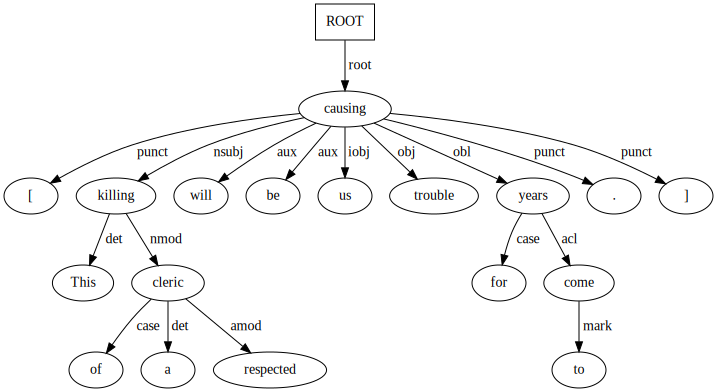

In [21]:
visualize(conll_to_stanza(trees[index]))

## Dependency parsing

Dependency parsing is the task of transforming a sentence into its corresponding dependency tree.

We have two steps to be done:

 - Construct a model based on training sentences and their respective dependency trees, that can be used to parse other sentences the same way.
 - Given this model, find the most optimal dependency tree for the given sentence.

_Possible solutions:_

 - Graph Based Dependency Parsing
 - Transition-Based Dependency Parsing
 - Neural Dependency Parsing
   - Neural graph-based parser
   - Neural transition-based parser

_Evaluation metrics:_

 - Labeled attachment score (LAS): the percentage of words that are assigned both the correct syntactic head and the correct dependency label
 - Unlabeled attachment score (UAS): the percentage of words that are assigned both the correct syntactic head

_SOTA:_

Evaluation dataset: [Penn Treebank](https://ai.stanford.edu/~ang/papers/acl11-WordVectorsSentimentAnalysis.pdf).

The current SOTA (state-of-the-art) on dependency parsing is a self-attention based [system](https://khalilmrini.github.io/Label_Attention_Layer.pdf) that has 97.42% UAS and 96.26% LAS. Their code is available on [github](https://github.com/KhalilMrini/LAL-Parser).

[](https://downloads.cs.stanford.edu/nlp/software/dependencies_manual.pdf)

_What do we use dependency parsing for?_

 - Relation and information extraction
 - Coreference or anaphora resolution
 - Synonym generation
 - Semantic parsing
 - Question answering
 
### Graph Based Dependency Parsing

Graph-based methods for creating dependency structures are based on the use of maximum spanning tree methods.

1. Connect every word in a sentence with dependencies
2. Every dependency is an edge
3. Score each edge independently (usually using some ML method)
4. Find maximum spanning tree using the Chu-Liu-Edmonds algorithm
   1. Contracting Stage
       1. Find the best incoming edge for each node in the graph.
       2. If a cycle is formed, merge the nodes into a new node.
   2. Expanding Stage
       1. Every contracted node will have exactly one best incoming edge, kicking out the others. There is no need for that contraction anymore.

### Transition-Based Dependency Parsing

Transition-based parsing systems employ a greedy stack-based algorithm called shift-reduce to create dependency structures.

 1. We initialize a state with input configuration, which consists of a stack, an input buffer of tokens, and a set of relations.
 2. We go through the possible configurations using a sequence of transition operations.
 3. We stop the iteration if we reached the final state.
 
Transitions in shift-reduce parsing (a popular solution for transitions):
 - $Shift$: Remove the first word in the buffer and push it on top of the stack.
 - $Left-Arc_r$: Add a dependency arc (wj, r, wi) to the arc set A, where wi is the word second to the top of the stack and wj is the word at the top of the stack. Remove wi from the stack.
 - $Right-Arc_r$: Add a dependency arc (wi, r, wj) to the arc set A, where wi is the word second to the top of the stack and wj is the word at the top of the stack. Remove wj from the stack.

### Neural Dependency Parsing

Usually builds on transition based or graph based approach.
![neural-transition](img/dl/neural-transition.png)
Model from [A Fast and Accurate Dependency Parser using Neural Networks by Danqi Chen and Christopher D. Manning](https://nlp.stanford.edu/pubs/emnlp2014-depparser.pdf)

![neural-graph](img/dl/neural-graph.png)
Model from [Deep Biaffine Attention for Neural Dependency Parsing by Timothy Dozat and Christopher D. Manning](https://arxiv.org/pdf/1611.01734.pdf)

### Examples

Let's take a look at the "I like apples" sentence!

#### Graph based dependency parsing using Chu-Liu-Edmonds

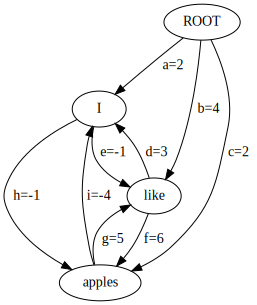

In [22]:
apple(0)

| Node | Best in edge |
| :-: | :-: |
| I | d |
| like | g |
| apples | f |

We need contraction! like + apples => l_a

| Edge | Kicks out |
| :-: | :-: |
| a |  |
| b | g |
| c | f |
| d |  |
| e | g |
| f |  |
| g |  |
| h | f |
| i |  |

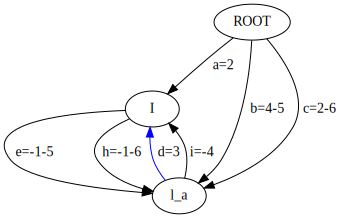

In [23]:
apple(1)

| Node | Best in edge |
| :-: | :-: |
| I | d |
| like | g |
| apples | f |
| l_a | __b__ |

We no longer need contraction! l_a => like + apples

| Edge | Kicks out |
| :-: | :-: |
| a |  |
| b | __g__ |
| c | f |
| d |  |
| e | g |
| f |  |
| g |  |
| h | f |
| i |  |

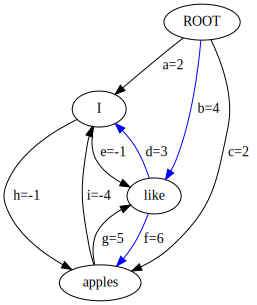

In [24]:
apple(2)

#### Transition based dependency parsing using Shift-Reduce
|   | Stack | Buffer | Transition |
| :-: | :-: | :-: | :-: |
| 1 | root | I, like, apples | SHIFT |
| 2 | root, I | like, apples | SHIFT |
| 3 | root, I, like | apples | LEFT-ARC |
| 4 | root, like | apples | SHIFT |
| 5 | root, like, apples |  | RIGHT-ARC |
| 6 | root, like |  | RIGHT-ARC |

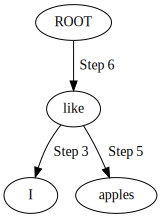

In [25]:
apple = graphviz.Digraph()
apple.edge("like", "I", label="Step 3")
apple.edge("like", "apples", label="Step 5")
apple.edge("ROOT", "like", label="Step 6")
apple

#### Pretrained models

In [26]:
sentence = "One morning I shot an elephant in my pajamas."

1	One	NUM	morning	nummod
2	morning	NOUN	shot	npadvmod
3	I	PRON	shot	nsubj
4	shot	VERB	shot	ROOT
5	an	DET	elephant	det
6	elephant	NOUN	shot	dobj
7	in	ADP	elephant	prep
8	my	PRON	pajamas	poss
9	pajamas	NOUN	in	pobj
10	.	PUNCT	shot	punct


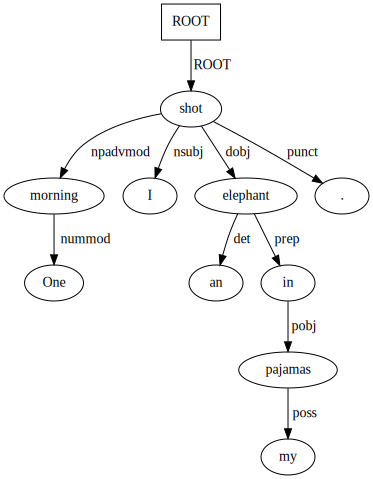

In [27]:
spacy_doc = spacy_nlp(sentence)
for token in spacy_doc:
    print(f"{token.i+1}\t{token.text}\t{token.pos_}\t{token.head.text}\t{token.dep_}")
visualize_spacy(spacy_doc)
#displacy.serve(spacy_doc, style="dep")

1	One	NUM	morning	nummod
2	morning	NOUN	shot	obl:tmod
3	I	PRON	shot	nsubj
4	shot	VERB	ROOT	root
5	an	DET	elephant	det
6	elephant	NOUN	shot	obj
7	in	ADP	pajamas	case
8	my	PRON	pajamas	nmod:poss
9	pajamas	NOUN	shot	obl
10	.	PUNCT	shot	punct


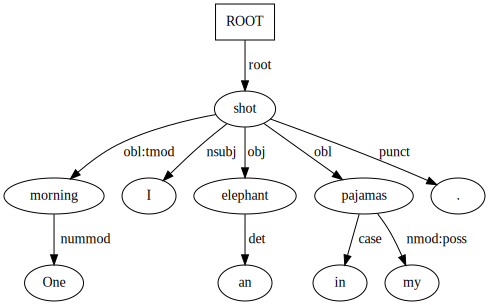

In [28]:
stanza_doc = stanza_nlp(sentence)
#print_conllu(stanza_doc)
for sent in stanza_doc.sentences:
    word_dict = {word.id: word.text for word in sent.words}
    word_dict[0] = 'ROOT'
    for word in sent.words:
        print(f'{word.id}\t{word.text}\t{word.upos}\t{word_dict[word.head]}\t{word.deprel}')
visualize(stanza_doc)

Your label namespace was 'pos'. We recommend you use a namespace ending with 'labels' or 'tags', so we don't add UNK and PAD tokens by default to your vocabulary.  See documentation for `non_padded_namespaces` parameter in Vocabulary.


1	One	NUM	shot	nsubj
2	morning	NOUN	shot	tmod
3	I	PRON	shot	nsubj
4	shot	VERB	ROOT	root
5	an	DET	elephant	det
6	elephant	NOUN	shot	dobj
7	in	ADP	shot	prep
8	my	PRON	pajamas	dep
9	pajamas	NOUN	in	dep
10	.	PUNCT	shot	punct


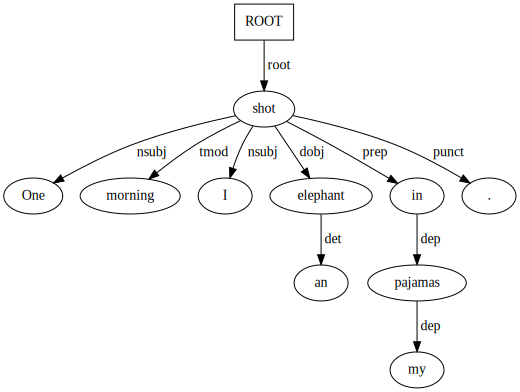

In [29]:
predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/biaffine-dependency-parser-ptb-2020.04.06.tar.gz")
predicted = predictor.predict(sentence=sentence)
for i, (word, dep, head, pos) in \
    enumerate(zip(predicted['words'], 
                  predicted['predicted_dependencies'], 
                  predicted['predicted_heads'], 
                  predicted['pos'])):
    head_text = "ROOT" if head == 0 else predicted["words"][head-1]
    print(f'{i+1}\t{word}\t{pos}\t{head_text}\t{dep}')
visualize_allen(predicted)

# Knowledge bases

## Wordnet

- Separates words into synsets
- Hand-crafted database (begun in 1985)
- Definitions and examples are also provided
- Includes Nouns, verbs, adjectives, adverbs..

Contains also:
- Hyponyms: e.g. dog-canine (IsA)
- Hypernyms: (reverse IsA)
- Coordinate terms with same parents
- Meronyms: Window - building (partOf)
- Entailment

- Structured into trees

There are many WordNets available in many languages

Looking up a word

In [30]:
wn.synsets("dog")

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

A synset is identfied with a 3part name of the form:'word.pos.nn'

In [31]:
wn.synsets("dog", pos=wn.VERB)

[Synset('chase.v.01')]

In [32]:
wn.synset('dog.n.01')

Synset('dog.n.01')

We can also query definitions, examples and lemmas of the synsets..

In [33]:
wn.synset('dog.n.01').definition()

'a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds'

In [34]:
wn.synset('dog.n.01').examples()

['the dog barked all night']

In [35]:
wn.synset('dog.n.01').lemmas()

[Lemma('dog.n.01.dog'),
 Lemma('dog.n.01.domestic_dog'),
 Lemma('dog.n.01.Canis_familiaris')]

We can iterate through all of WordNet or just from a synset

In [36]:
for lemma in wn.synset("dog.n.01").lemmas():
    print(lemma.name())

dog
domestic_dog
Canis_familiaris


In [37]:
for synset in list(wn.all_synsets("n"))[:10]:
    print(synset)

Synset('entity.n.01')
Synset('physical_entity.n.01')
Synset('abstraction.n.06')
Synset('thing.n.12')
Synset('object.n.01')
Synset('whole.n.02')
Synset('congener.n.03')
Synset('living_thing.n.01')
Synset('organism.n.01')
Synset('benthos.n.02')


We can get the relationships:

In [38]:
dog = wn.synset("dog.n.01")
dog.hypernyms()

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]

In [39]:
dog.hyponyms()

[Synset('basenji.n.01'),
 Synset('corgi.n.01'),
 Synset('cur.n.01'),
 Synset('dalmatian.n.02'),
 Synset('great_pyrenees.n.01'),
 Synset('griffon.n.02'),
 Synset('hunting_dog.n.01'),
 Synset('lapdog.n.01'),
 Synset('leonberg.n.01'),
 Synset('mexican_hairless.n.01'),
 Synset('newfoundland.n.01'),
 Synset('pooch.n.01'),
 Synset('poodle.n.01'),
 Synset('pug.n.01'),
 Synset('puppy.n.01'),
 Synset('spitz.n.01'),
 Synset('toy_dog.n.01'),
 Synset('working_dog.n.01')]

In [40]:
dog.member_holonyms()

[Synset('canis.n.01'), Synset('pack.n.06')]

In [41]:
dog.root_hypernyms()

[Synset('entity.n.01')]

In [42]:
good = wn.synset("good.a.01")
good.lemmas()[0].antonyms()

[Lemma('bad.a.01.bad')]

We can also measure similarity between synsets. There are many different measures:

In [43]:
wn.path_similarity(wn.synsets("dog")[0], wn.synsets("cat")[0])

0.2

In [44]:
wn.wup_similarity(wn.synsets("dog")[0], wn.synsets("cat")[0])

0.8571428571428571

- WordNet can be great for a lot of simple baselines 
- But many relations are missing from wordnet
- Can be also used alongside with Deep models


## ConceptNet [Liu et al 2004,](https://link.springer.com/article/10.1023/B:BTTJ.0000047600.45421.6d)

- Created with lexical patterns
- Consists of relations that connects concepts

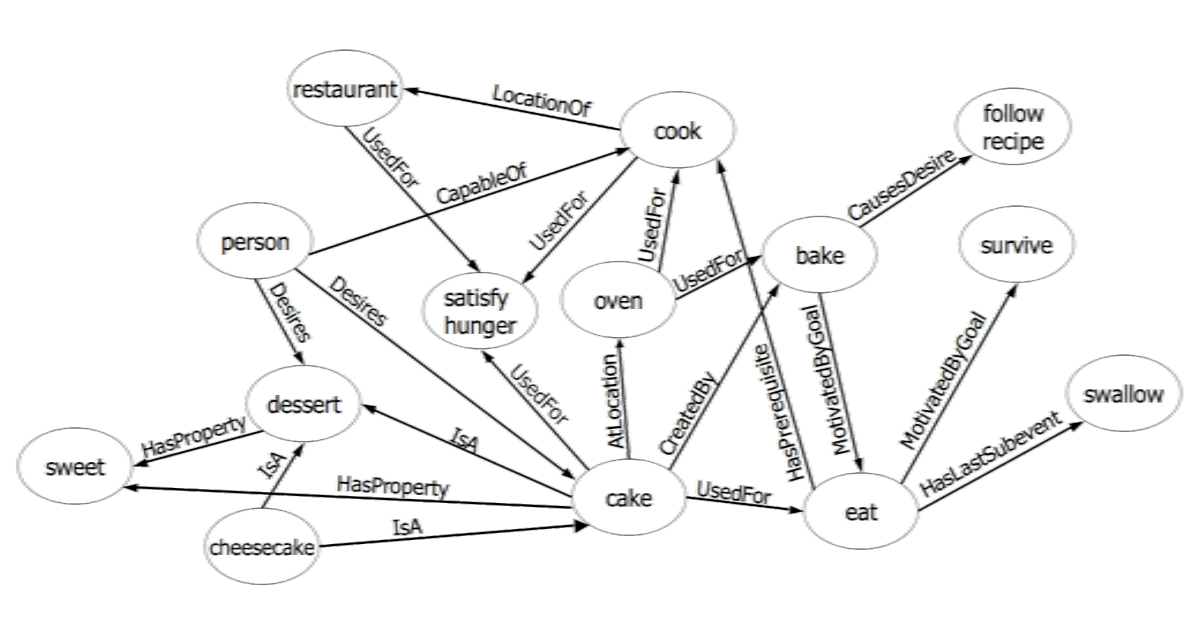

In [45]:
obj = requests.get('http://api.conceptnet.io/c/en/dog').json()
obj.keys()

dict_keys(['@context', '@id', 'edges', 'version', 'view'])

In [46]:
len(obj["edges"])

20

In [47]:
obj["edges"][0].keys()

dict_keys(['@id', '@type', 'dataset', 'end', 'license', 'rel', 'sources', 'start', 'surfaceText', 'weight'])

In [48]:
obj["edges"][0]["rel"]

{'@id': '/r/CapableOf', '@type': 'Relation', 'label': 'CapableOf'}

In [49]:
len(obj["edges"][0]["sources"])

63

In [50]:
obj["edges"][0]["surfaceText"]

'[[dog]] can [[bark]]'

In [51]:
obj["edges"][0]["start"], obj["edges"][0]["end"]

({'@id': '/c/en/dog',
  '@type': 'Node',
  'label': 'dog',
  'language': 'en',
  'term': '/c/en/dog'},
 {'@id': '/c/en/bark',
  '@type': 'Node',
  'label': 'bark',
  'language': 'en',
  'term': '/c/en/bark'})

In [52]:
obj = requests.get('http://api.conceptnet.io/related/c/en/dog').json()
obj.keys()

dict_keys(['@id', 'related'])

In [53]:
len(obj["related"])

50

In [54]:
obj["related"][:10]

[{'@id': '/c/en/dog', 'weight': 1.0},
 {'@id': '/c/es/perrote', 'weight': 1.0},
 {'@id': '/c/it/cagnolone', 'weight': 1.0},
 {'@id': '/c/ja/わん公', 'weight': 1.0},
 {'@id': '/c/ja/ワン公', 'weight': 1.0},
 {'@id': '/c/ja/猫嫌い', 'weight': 1.0},
 {'@id': '/c/ja/死んだ振り', 'weight': 0.992},
 {'@id': '/c/ja/洋犬', 'weight': 0.992},
 {'@id': '/c/es/perrada', 'weight': 0.979},
 {'@id': '/c/pt/cães', 'weight': 0.976}]

## Fourlang [Recski et al 2018](https://academic.oup.com/ijl/article/31/3/274/3835852?guestAccessKey=9f090231-2795-47af-aa44-5fb15d4df0d8) [Kovács et al 2020](https://www.aclweb.org/anthology/2020.semeval-1.15/)
- Can be used as a graph representation of a text
- Can be used as a knowledge base using dictionaries

Demo: https://ir-group.ec.tuwien.ac.at/fourlang/

Fourlang graph of the sentence: "People love dogs."

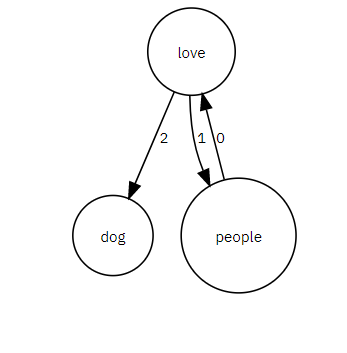

Can be "Expanded":

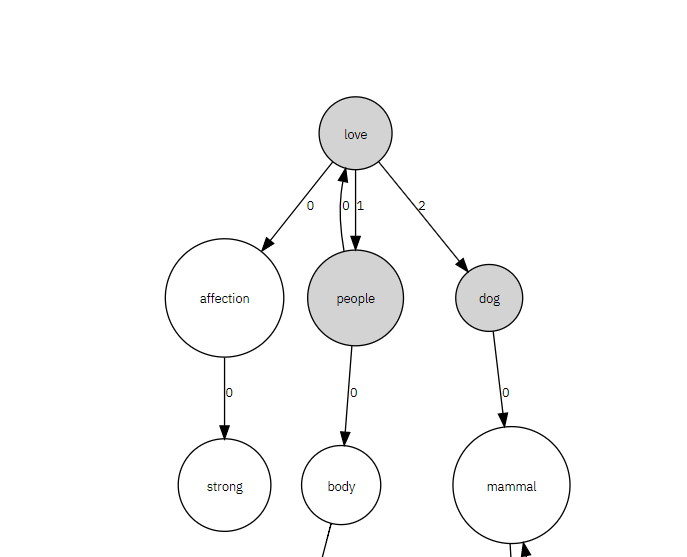